In [16]:
import numpy as np

In [17]:
#Implementing Principal Component Analysis algorithm
class CustomPCA():

  def __init__(self, components):
    self.components = components

  def get_principalComponents(self, X):

    #Centering the data on its mean
    x_mean = np.mean(X, axis=0)
    X = X - x_mean

    #Determining the auto covariance matrix of the data
    covariance = np.cov(X.T)

    #Computing the eigenvalues and eigenvectors of the covariance matrix of X
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    eigenvectors = eigenvectors.T

    #Ordering the eigenvectors in decreasing order of eigenvalues
    ev_order = np.argsort(eigenvalues)
    ev_desc = ev_order[::-1]
    eigenvalues = eigenvalues[ev_desc]
    eigenvectors = eigenvectors[ev_desc]

    #Obtaining the required number of principal components 
    pca = eigenvectors[0:self.components]

    #Transforming the data
    X_new = self.transform(X, pca, x_mean)
    return X_new
  
  def transform(self, X, pca, mean):
    X = X - mean
    X_pca = np.dot(X, pca.T)
    
    return X_pca



In [19]:
from sklearn import datasets
import matplotlib.pyplot as plt

dataset_iris = datasets.load_iris()
X = dataset_iris.data
Y = dataset_iris.target

model = CustomPCA(2)
X_projection = model.get_principalComponents(X)

print('Number of features in original dataset:' , X.shape[1])
print('Number of features in transformed dataset:' , X_projection.shape[1])


Number of features in original dataset: 4
Number of features in transformed dataset: 2


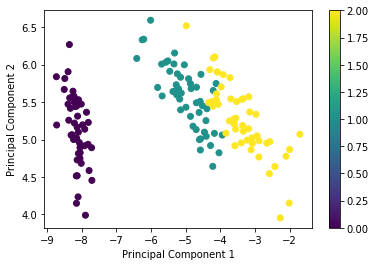

In [20]:
x1 = X_projection[:, 0]
x2 = X_projection[:, 1]

plt.scatter(x1, x2, c=Y)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()